<a href="https://colab.research.google.com/github/Baeltor/DSI/blob/main/Ejemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import seaborn as sns

In [5]:
url = 'https://raw.githubusercontent.com/Izainea/seminario-de-programacion/master/Cuadernos/Clase%202/Bases/Credito_dias.csv'
df = pd.read_csv(url)


In [33]:
df

,totmou,totrev,creditcd,eqpdays,Customer_ID
0,7269.0,906.58,Y,371,1082423
1,13552.0,1172.25,N,83,1069232
2,4152.0,577.39,Y,675,1031705
3,1863.0,294.26,Y,218,1089806
4,4155.0,433.16,N,222,1076695
...,...,...,...,...,...
9995,2570.0,484.31,Y,611,1027614
9996,2105.0,583.36,Y,1243,1098422
9997,3690.0,294.29,Y,212,1096497
9998,3333.0,233.08,Y,290,1087248


<ipython-input-10-582502f3e0e7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='totmou', y='creditcd', inner='box', palette='Dark2')


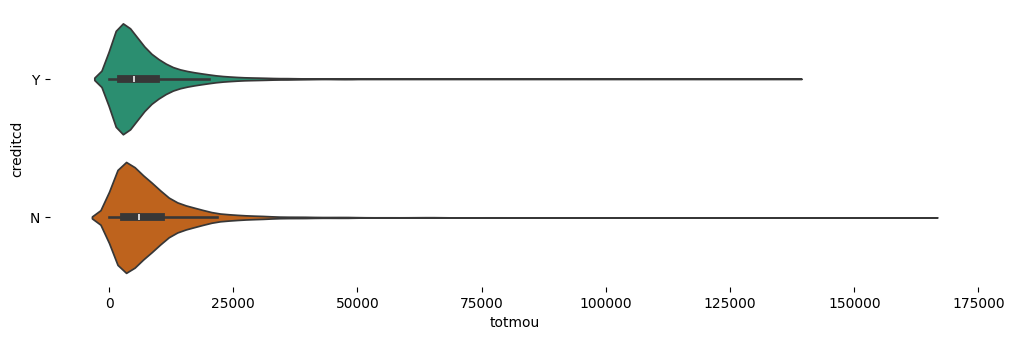

In [10]:
# @title creditcd vs totmou

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['creditcd'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='totmou', y='creditcd', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

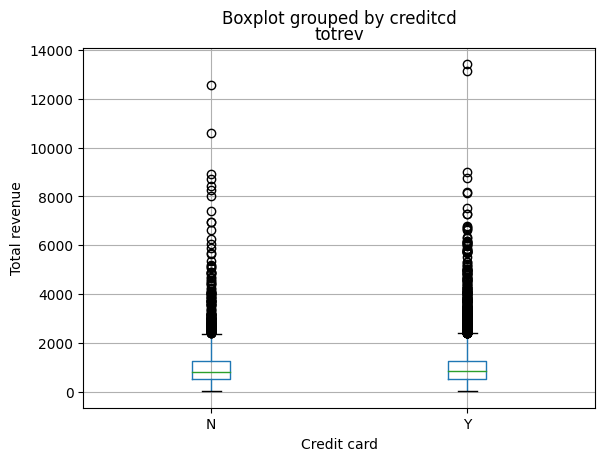

In [8]:
# @title Total revenue by credit card

import matplotlib.pyplot as plt
df.boxplot(column='totrev', by='creditcd')
plt.xlabel('Credit card')
_ = plt.ylabel('Total revenue')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   totmou       10000 non-null  float64
 1   totrev       10000 non-null  float64
 2   creditcd     9848 non-null   object 
 3   eqpdays      10000 non-null  int64  
 4   Customer_ID  10000 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 390.8+ KB


In [9]:
df.shape

(10000, 5)

In [12]:
df.describe(include = ['object', 'number'])

,totmou,totrev,creditcd,eqpdays,Customer_ID
count,10000.000000,10000.000000,9848,10000.000000,1.000000e+04
unique,NaN,NaN,2,NaN,NaN
top,NaN,NaN,Y,NaN,NaN
freq,NaN,NaN,6796,NaN,NaN
mean,7692.804866,1042.133807,NaN,386.794500,1.049965e+06
std,8657.917883,857.144895,NaN,252.720196,2.879424e+04
min,0.000000,11.100000,NaN,-5.000000,1.000014e+06
25%,2576.000000,526.787500,NaN,210.000000,1.025053e+06
50%,5262.000000,820.235000,NaN,338.000000,1.049652e+06
75%,9823.250000,1272.975000,NaN,522.000000,1.074798e+06


In [13]:
df[df['creditcd'].isnull()]

,totmou,totrev,creditcd,eqpdays,Customer_ID
44,5684.0,857.65,NaN,244,1072218
47,925.0,373.12,NaN,344,1066597
127,14466.0,2243.76,NaN,387,1023352
253,2504.0,756.79,NaN,495,1045521
427,76260.0,5526.11,NaN,361,1001813
...,...,...,...,...,...
9428,15591.0,1330.71,NaN,447,1050795
9561,3011.0,522.14,NaN,74,1096985
9634,853.0,650.34,NaN,780,1025203
9783,33660.0,4247.85,NaN,206,1099258


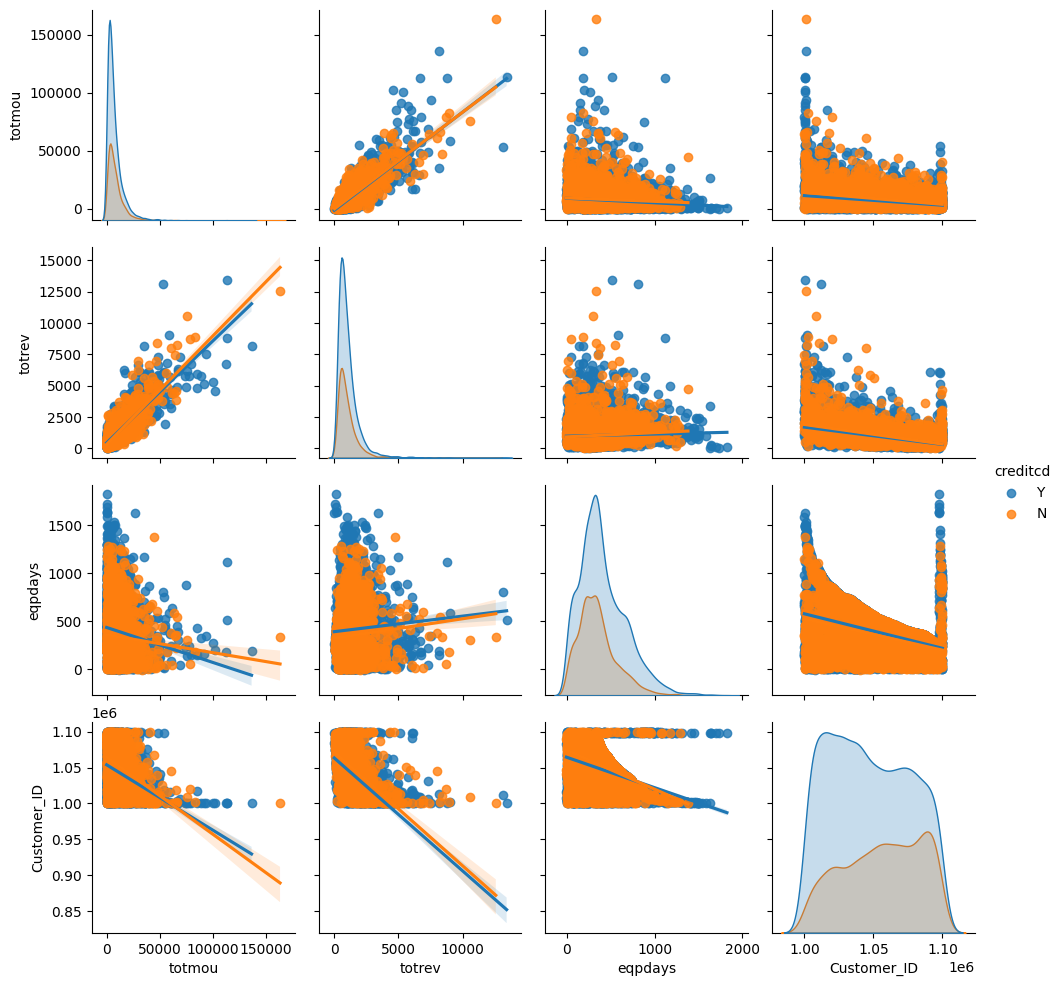

In [16]:
sns.pairplot(data=df, hue = 'creditcd', kind = 'reg')

In [18]:
corr = df[['totmou', 'totrev', 'eqpdays']].corr()

In [19]:
corr

,totmou,totrev,eqpdays
totmou,1.000000,0.835485,-0.110179
totrev,0.835485,1.000000,0.061617
eqpdays,-0.110179,0.061617,1.000000


<Axes: xlabel='totmou', ylabel='totrev'>

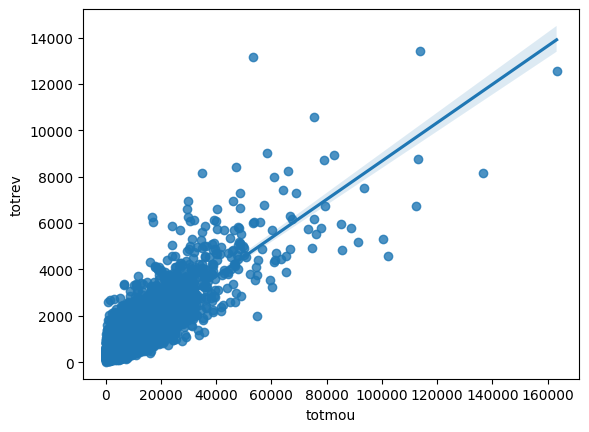

In [37]:
sns.regplot(data = df, x = 'totmou', y = 'totrev')

In [38]:
# prompt: realiza un modelo de regresión lineal con las variables totmou	totrev del dataframe

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the data
df = pd.read_csv(url)

# Select the relevant columns
X = df[['totmou']]
y = df['totrev']

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Print the model coefficients
print(model.coef_)

# Print the model intercept
print(model.intercept_)


[0.08271404]
405.8308490051819


In [31]:
#crear un nuevo data frame
df_aux = df.dropna()
df_aux = df_aux[df_aux['eqpdays']>0]

In [32]:
df_aux.shape

(9826, 5)